In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [66]:
amazon_ratings = pd.read_csv('OneDrive/Desktop/test/DatafinitiElectronicsProductData.csv')
amazon_ratings.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [67]:
amazon_ratings.shape

(7299, 27)

In [68]:
popular_products = pd.DataFrame(amazon_ratings.groupby('id')['reviews.rating'].count())
most_popular = popular_products.sort_values('reviews.rating', ascending=False)
most_popular.head(10)

,reviews.rating
id,
AVpgfP3DilAPnD_xtG3M,1604
AVpf3txeLJeJML43FN82,495
AVsRhL-fQMlgsOJE6zvB,477
AVpfnuDailAPnD_xfKZY,357
AVpg8i6NilAPnD_xzQdN,342
AV4GShTMvKc47QAVrFsX,340
AVpiFC-LilAPnD_xAgKu,260
AVpf2pgLilAPnD_xjed4,191
AVpfKRGKLJeJML433rPX,178


<AxesSubplot:xlabel='id'>

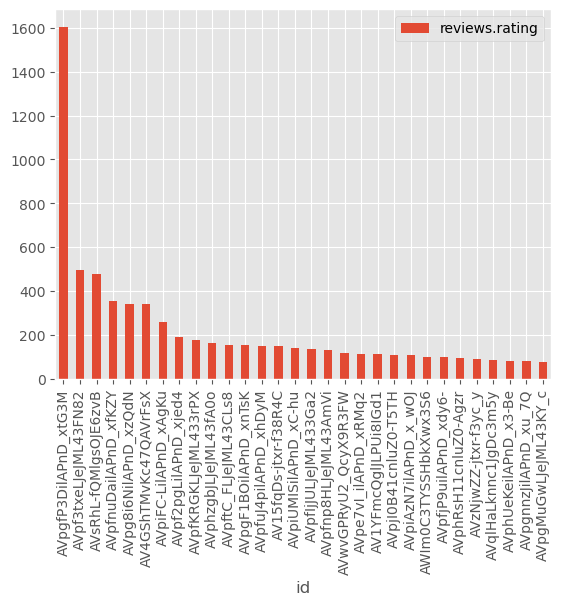

In [69]:
most_popular.head(30).plot(kind = "bar")

In [70]:
amazon_ratings1 = amazon_ratings.head(12000)

In [71]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='reviews.rating', index='reviews.username', columns='id', fill_value=0)
ratings_utility_matrix.head()

id,AV13V_i2glJLPUi8PFgb,AV15fqDs-jtxr-f38R4C,AV1YFmcQglJLPUi8IGd1,AV2Zps11GV-KLJ3al16A,AV4GShTMvKc47QAVrFsX,AVpe5iL11cnluZ0-ZVzB,AVpe7vI_ilAPnD_xRMq2,AVpe8ZRY1cnluZ0-aY4H,AVpe9BGF1cnluZ0-annA,AVpf0Nyo1cnluZ0-rzhu,...,AVpiUMISilAPnD_xC-hu,AVpio2wSilAPnD_xGGln,AVpivePGilAPnD_xHH0l,AVpjI0B41cnluZ0-T5TH,AVpjedgc1cnluZ0-W4NI,AVqlHaLknnc1JgDc3m5y,AVsRhL-fQMlgsOJE6zvB,AVwvGPRyU2_QcyX9R3FW,AVzNjwZZ-jtxr-f3yc_y,AWIm0C3TYSSHbkXwx3S6
reviews.username,,,,,,,,,,,,,,,,,,,,,
007Shaii,0,0,0.0,0,0,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0,4.0
09octavius,0,0,0.0,0,0,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
1080p,0,0,0.0,0,0,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
1233Studio,0,0,5.0,0,0,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
1234,0,0,0.0,0,0,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0


In [72]:
ratings_utility_matrix.shape

(6386, 50)

In [73]:
X = ratings_utility_matrix.T
X.head()

reviews.username,007Shaii,09octavius,1080p,1233Studio,1234,128Gold,12AMWhistler,12packmax,13igtymer,15thpaladin,...,yaya,yoda37,yogi,youdontknowme,yourkidding,youvegotmoxie,yuxx0051,zilla,zombiepie69-7,zznj
id,,,,,,,,,,,,,,,,,,,,,
AV13V_i2glJLPUi8PFgb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV15fqDs-jtxr-f38R4C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YFmcQglJLPUi8IGd1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
AV2Zps11GV-KLJ3al16A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV4GShTMvKc47QAVrFsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
X.shape

(50, 6386)

In [75]:
X1=X

In [76]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(50, 10)

In [77]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(50, 50)

In [78]:
X.index[10]

'AVpf24SVLJeJML43FAIX'

In [79]:
i = "AVpf24SVLJeJML43FAIX"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

10

In [80]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(50,)

In [81]:
Recommend = list(X.index[correlation_product_ID > 0.70])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['AV2Zps11GV-KLJ3al16A', 'AVsRhL-fQMlgsOJE6zvB']

In [82]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [83]:
product_descriptions = pd.read_csv('OneDrive/Desktop/test/DatafinitiElectronicsProductData.csv')
product_descriptions.shape

(7299, 27)

In [84]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [85]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["reviews.text"].head(10)

0    This keyboard is very easy to type on, but the...
1    It's thin and light. I can type pretty easily ...
2    I love the new design the keys are spaced well...
3    Attached easily and firmly. Has a nice feel. A...
4    Our original keyboard was okay, but did not ha...
5    purchased to replace original surface pro 3 ke...
6    I find it very comfortable to type with it but...
7    Good Keyboard and addition to the Surface Pro ...
8    tough getting it to work on surface pro 3, but...
9    I can now quickly and hassle free log into my ...
Name: reviews.text, dtype: object

In [86]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["reviews.text"])
X1

<500x1741 sparse matrix of type '<class 'numpy.float64'>'
	with 7473 stored elements in Compressed Sparse Row format>

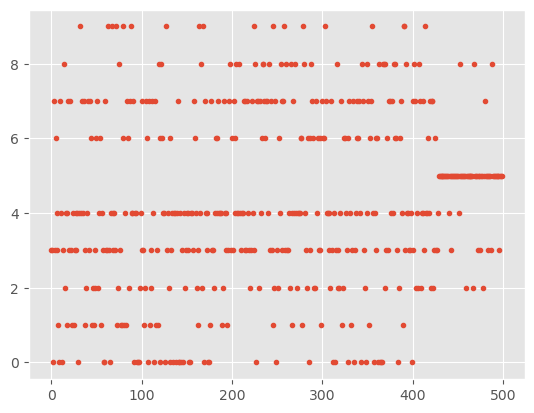

In [87]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [88]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [89]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 got
 wasn
 radio
 face
 like
 greatest
 keyboard
 useless
 great
 warrior
Cluster 1:
 keyboard
 feel
 keys
 great
 good
 typing
 touch
 fingerprint
 surface
 work
Cluster 2:
 keyboard
 extra
 worth
 better
 pro
 surface
 fingerprint
 id
 spaced
 original
Cluster 3:
 surface
 pro
 cover
 type
 love
 keyboard
 fingerprint
 id
 great
 use
Cluster 4:
 recommend
 scanner
 fingerprint
 definitely
 keyboard
 surface
 highly
 camera
 works
 perfect
Cluster 5:
 fingerprint
 like
 works
 option
 keyboard
 access
 reader
 security
 love
 sensor
Cluster 6:
 easy
 use
 print
 finger
 keyboard
 great
 product
 makes
 nice
 love
Cluster 7:
 great
 works
 pro
 surface
 fingerprint
 makes
 easier
 scanner
 reader
 keyboard
Cluster 8:
 nice
 keyboard
 really
 just
 fingerprint
 like
 scanner
 works
 feels
 great
Cluster 9:
 iphone
 carplay
 unit
 apple
 phone
 alpine
 car
 radio
 great
 buy


C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [91]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [97]:
show_recommendations("fingerprint")

Cluster 5:
 fingerprint
 like
 works
 option
 keyboard
 access
 reader
 security
 love
 sensor
